# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
import pandas as pd
import numpy as np

In [5]:
pd.read_clipboard()

,StudentID,|,Age,|.1,Tardies,|.2
|--------|-----|------------|,,,,,,
|,1,|,17,|,10,|
|,2,|,51,|,1,|
|,3,|,27,|,5,|
|,4,|,21,|,9,|
|,5,|,36,|,4,|
|,6,|,48,|,2,|
|,7,|,19,|,9,|
|,8,|,26,|,6,|
|,9,|,54,|,0,|


In [6]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

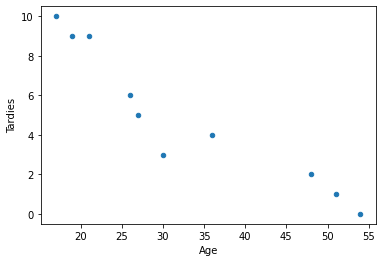

In [8]:
# Your code here.

student_data.plot.scatter( x= 'Age', y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# seems like could be true since from 35 to younger are comming in later

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [24]:
import pylab as plt                                # plotting library
import seaborn as sns                              # plotting library
sns.set(style='white')                             # seaborn style
from sklearn.linear_model import LogisticRegression            # logistic regression model   

from sklearn.preprocessing import StandardScaler               # standarized
from sklearn.preprocessing import LabelEncoder               

from sklearn.model_selection import train_test_split as tts

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from numpy import cumsum
import matplotlib

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pylab as plt

In [22]:
x=sm.add_constant(student_data.Age)

y=student_data.Tardies

modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           5.57e-05
Time:                        13:31:47   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
cov = student_data.cov()
cov

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [ ]:
# al igual que la correlación indica que es negativa, osea cuando la edad aumenta, llegan menos tarde.

In [28]:
corr = student_data.corr()
corr

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
''' The correlation is saying that is negative meaning that the higher the age they are less like to be late'''

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [92]:
# Uso la regresión logistica ya que estamos viendo una regresion linear, aunque se podria usar la regresion linear normal para ello debido a los pocos datos.

from sklearn.linear_model import LinearRegression as LinReg


X=student_data.drop('Tardies', axis=1)._get_numeric_data()

y=student_data.Tardies

linreg=LinReg().fit(X, y)



In [93]:
linreg.intercept_  # const, beta0, ordenada en el origen


12.888803363135771

In [94]:
linreg.coef_

array([-0.24282077])

Plot your regression model on your scatter plot.

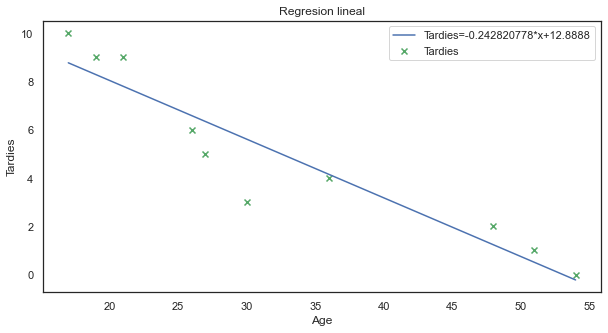

In [99]:
x=np.linspace(student_data.Age.min(), student_data.Age.max(), 10)
y=-0.24282077*x + 12.8888

plt.figure(figsize=(10, 5))

# la recta de ajuste
plt.plot(x, y, label='Tardies={}*x+{}'.format(-0.242820778, 12.8888))

# datos
plt.scatter(student_data.Age, student_data.Tardies, marker='x', c='g', label='Tardies')

plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

'''I believe that yes, age is an ok predictor of tardiness '''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [42]:
# Import any libraries you may need & the data

vehicle = pd.read_csv(r'../7.3-lab_regression_analysis/vehicles.csv')
vehicle.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [101]:
vehicle.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [125]:

# no quito CO2 Emission Grams/Mile para ver la correlación, ya se la quito al implementar el modelo

X1 = vehicle.drop(['Make', 'Model', 'Engine Displacement',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'City MPG', 'Highway MPG'], axis = 1 )

y1 = vehicle['CO2 Emission Grams/Mile']

In [126]:
X1.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550


In [127]:
# Your response here. 

corr=X1.corr()   # correlation matrix

corr

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


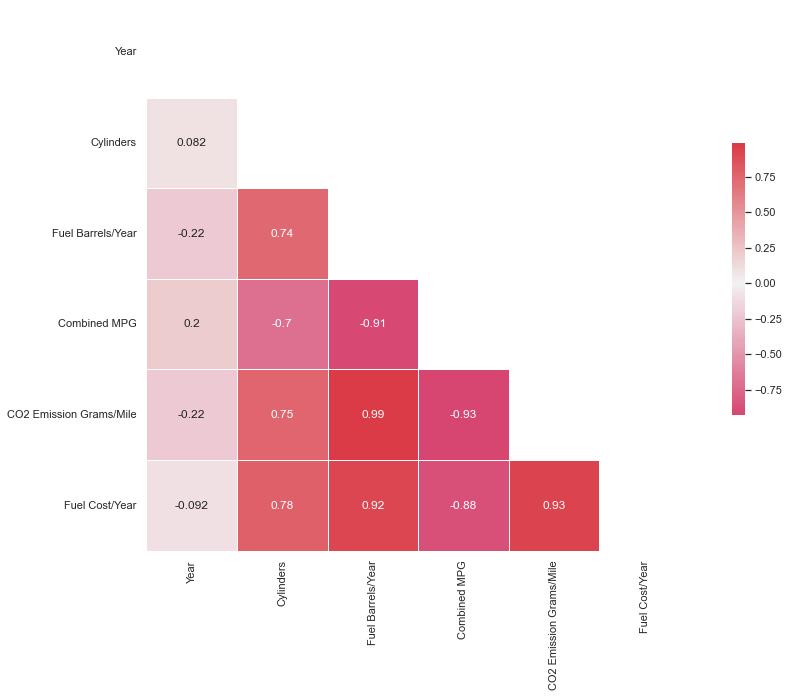

In [128]:
# Your response here. 
# Your code here
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(X1.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(X1.corr(),
            mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [129]:
''' parece que la variable de fuel/barrels year es la mas correlacionada con CO2, curiosamente la seguna es Cylinders, e inversamente Combined MPG y Highway MPG'''
''' The least one would be Year'''

' The least one would be Year'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [130]:
''' will be using linear regression '''



' will be using linear regression '

In [131]:
vehicle.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [132]:
#pongo todo el data frame para jugar un rato y ver datos curiosos+

x=sm.add_constant(vehicle[[
    
    'Cylinders',
    'Fuel Barrels/Year',
    'City MPG',
    #'Highway MPG',
    #'Fuel Type',
    #'Engine Displacement'
    'Combined MPG'
    #'Fuel Cost/Year',
    #'Make'
    #'Model MPG',
    #'Year'
    #'Make',
    #'Transmission',
    #'Drivetrain',
    #'Vehicle Class'


    
]].apply(lambda x: x.fillna(x.mean()))

)

y=vehicle['CO2 Emission Grams/Mile']


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.979
Model:                                 OLS   Adj. R-squared:                  0.979
Method:                      Least Squares   F-statistic:                 4.172e+05
Date:                     Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                             16:23:30   Log-Likelihood:            -1.5348e+05
No. Observations:                    35952   AIC:                         3.070e+05
Df Residuals:                        35947   BIC:                         3.070e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               172.0724      1.769     97.275      0.000     168.605     175.540
Cylinders             3.4834      0.080     43.593      0.000       3.327       3.640
Fuel Barrels/Year    20.9000      0.056    375.381      0.000      20.791      21.009
City MPG              4.0616      0.120     33.754      0.000       3.826       4.297
Combined MPG         -7.8547      0.128    -61.262      0.000      -8.106      -7.603
==============================================================================
Omnibus:                    75853.408   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        362787775.960
Skew:                          18.439   Prob(JB):                         0.00
Kurtosis:                     493.736   Cond. No.                         634.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
''' podemos ver que el Fuel Barrels/Year es la variable que mas peso tiene con un coef del 20.900, ademas la combinación elegida de columnas es la que mas R2 da al 0.979 muy alta. Siendo
 datos muy buenos para las predicciones.
 
 Es curioso que si incluyo solo city MPG su peso es del 4% mientras que si incluyo ambas City y Highway MPG es solo del 0.99. Si solo dejo Highway es -2.8 por lo que se vuelve una relacion inversa.

 También podria quedarme con pocas columnas porque mi r2 es muy alto con city mpg, y fuel barrel /year 

 Cuanto R2 sea mas cercano a 1 mejor
 '''

' podemos ver que el Fuel Barrels/Year es la variable que mas peso tiene con un coef del 20.900, ademas la combinación elegida de columnas es la que mas R2 da al 0.979 muy alta. Siendo\n datos muy buenos para las predicciones.\n \n Es curioso que si incluyo solo city MPG su peso es del 4% mientras que si incluyo ambas City y Highway MPG es solo del 0.99. Si solo dejo Highway es -2.8 por lo que se vuelve una relacion inversa.\n\n También podria quedarme con pocas columnas porque mi r2 es muy alto con city mpg, y fuel barrel /year \n\n Cuanto R2 sea mas cercano a 1 mejor\n '

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [145]:
from sklearn.linear_model import LinearRegression as LinReg
vehicle=vehicle.dropna()

X=X1.drop('CO2 Emission Grams/Mile', axis=1)._get_numeric_data()

y=X1['CO2 Emission Grams/Mile']

In [146]:
linreg=LinReg().fit(X, y)


In [147]:
linreg.intercept_  # const, beta0, ordenada en el origen


769.8882836465344

In [148]:
dict(zip(X.columns, linreg.coef_))


{'Year': -0.3206167315187339,
 'Cylinders': 1.8787997557926208,
 'Fuel Barrels/Year': 19.052925065032316,
 'Combined MPG': -3.0403993802126634,
 'Fuel Cost/Year': 0.0323094789413853}

In [149]:
''' efectivamente vemos que el fuel barrels/year sigue siendo la columna con mayor peso, mientras la segunda es Engine Displacement'''

' efectivamente vemos que el fuel barrels/year sigue siendo la columna con mayor peso, mientras la segunda es Engine Displacement'

In [150]:
from sklearn.preprocessing import StandardScaler
X_norm=StandardScaler().fit_transform(X)

linreg=LinReg().fit(X_norm, y)

In [141]:
dict(zip(X.columns, linreg.coef_))
# uf la normalizacón fortalece agresivamente el Fuel Barrel/year y el fuel cost/year'''

{'Year': -3.233467601729989,
 'Cylinders': 3.2977516609760755,
 'Fuel Barrels/Year': 85.1136185297641,
 'Combined MPG': -15.543548811396516,
 'Fuel Cost/Year': 16.37934129738456}

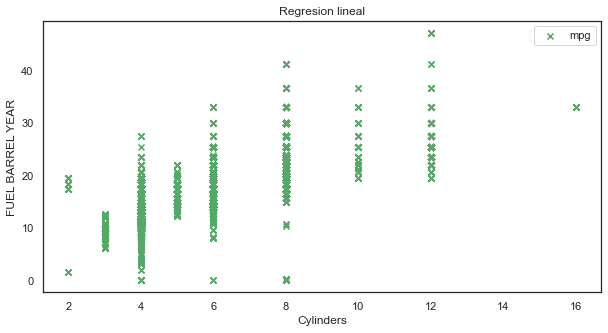

In [151]:
# plot

x=np.linspace(X['Cylinders'].min(), X['Cylinders'].max(), 50)

plt.figure(figsize=(10, 5))


# datos
plt.scatter(X['Cylinders'], X['Fuel Barrels/Year'], marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('Cylinders')
plt.ylabel('FUEL BARREL YEAR')
plt.legend()
plt.show();

In [ ]:
''' por ejmplo por juagr he decido comparar graficamente dos columnas, hay una concentración entre 4 y 8 cylinders que produce el mayor numero de consumo de barriles al año''

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [153]:
X.columns

Index(['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
       'Fuel Cost/Year'],
      dtype='object')

In [157]:
# Your response here. 

x=sm.add_constant(vehicle[[
    
    'Cylinders',
    'Fuel Barrels/Year',
    #'City MPG',
    #'Highway MPG',
    #'Fuel Type',
    #'Engine Displacement'
    'Combined MPG',
    'Fuel Cost/Year',
    #'Make'
    #'Model MPG',
    'Year'
    #'Make',
    #'Transmission',
    #'Drivetrain',
    #'Vehicle Class'


    
]].apply(lambda x: x.fillna(x.mean()))

)

y=vehicle['CO2 Emission Grams/Mile']


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                             16:33:24   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
''' lo mismo de siempre fuel Barrels year es la que mas peso tiene, seguida de combined mpg y cylinders con un R2 de 0.981 muy alto mas que dejando el resto de columnas'''

# Random forest porque quiero --

In [158]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC

In [160]:
dtr=DTR().fit(X, y)


In [162]:
# parece que le da mas valor al año que cuando haciamos la lineal.

dict(zip(X.columns, dtr.feature_importances_))


{'Year': 8.95925269401326e-05,
 'Cylinders': 3.875085730229579e-05,
 'Fuel Barrels/Year': 0.8388480631918269,
 'Combined MPG': 0.15990623695282435,
 'Fuel Cost/Year': 0.0011173564711062043}

In [163]:
X_norm=StandardScaler().fit_transform(X)

dtr=DTR().fit(X_norm, y)

In [164]:
dict(zip(X.columns, dtr.feature_importances_))


{'Year': 8.932982302632363e-05,
 'Cylinders': 3.912503342417351e-05,
 'Fuel Barrels/Year': 0.8390185438286972,
 'Combined MPG': 0.16052883951755362,
 'Fuel Cost/Year': 0.0003241617972987064}

In [165]:
rfr=RFR(n_estimators=2000).fit(X_norm, y)


In [166]:
dict(zip(X.columns, rfr.feature_importances_))   # de media


{'Year': 0.00013894025482373296,
 'Cylinders': 6.0206776594226574e-05,
 'Fuel Barrels/Year': 0.8372133286228012,
 'Combined MPG': 0.16206617566472473,
 'Fuel Cost/Year': 0.0005213486810560804}

In [ ]:
# si entiendo despues de fitearlo con los arboles sale que el peso se lo lleva el Cylinders dandole mas importancia sobre el resto de columnas.


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 